In [1]:
# Import modules
import pandas as pd
import numpy as np
import statsmodels as sm
import pylab as pl
from scipy import stats
from six import StringIO
from sklearn import preprocessing
from sklearn import cluster, tree, decomposition
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

In [2]:
# Download our dataset
travel = pd.read_csv("travel_data.csv")

In [3]:
# Preview our data
travel.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,0,0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,...,0,1,8286,1,0,1,0,63,1258,68
1,1,1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,...,0,1,1842,3,0,1,2,198,786,37
2,2,2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,...,0,1,8746,1,0,1,6,105,29,22
3,3,3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,...,0,1,6210,3,1,1,2,198,1234,42
4,4,4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,...,1,1,12812,5,0,1,2,50,368,83


In [4]:
travel.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,0,0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,...,0,1,8286,1,0,1,0,63,1258,68
1,1,1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,...,0,1,1842,3,0,1,2,198,786,37
2,2,2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,...,0,1,8746,1,0,1,6,105,29,22
3,3,3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,...,0,1,6210,3,1,1,2,198,1234,42
4,4,4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,...,1,1,12812,5,0,1,2,50,368,83


# Dataset Description of fields
![alt text](https://miro.medium.com/max/704/1*qx6uN9Zr1Y2BVtm_yCAv5Q.png)

In [5]:
# Get some base information on our dataset
print("Rows     : ", travel.shape[0])
print("Columns  : ", travel.shape[1])
print("\nFeatures : \n", travel.columns.tolist())
print("\nMissing values : ", travel.isnull().sum().values.sum())
print("\nUnique values :  \n", travel.nunique())

Rows     :  100000
Columns  :  27

Features : 
 ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'date_time', 'site_name', 'posa_continent', 'user_location_country', 'user_location_region', 'user_location_city', 'orig_destination_distance', 'user_id', 'is_mobile', 'is_package', 'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster']

Missing values :  36329

Unique values :  
 Unnamed: 0                   100000
Unnamed: 0.1                 100000
Unnamed: 0.1.1               100000
date_time                     99886
site_name                        41
posa_continent                    5
user_location_country           201
user_location_region            779
user_location_city            10779
orig_destination_distance     62206
user_id                       88863
is_mobile                         2
is_package     

In [6]:
# Get statistics for numerical columns
travel.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,63915.000000,1.000000e+05,...,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,49999.500000,1.882530e+07,9.838570,2.678150,85.995070,308.636990,27676.391240,1960.661721,6.054383e+05,...,0.336750,1.111750,14426.32738,2.577290,0.079930,1.487980,3.150920,81.093290,598.848330,49.860370
std,28867.657797,28867.657797,1.086183e+07,11.996426,0.749018,59.292002,208.706581,16768.647409,2228.153377,3.516154e+05,...,0.734449,0.451602,11036.98122,2.149263,0.271186,1.280262,1.620534,56.111519,510.959297,28.885423
min,0.000000,0.000000,1.012000e+03,2.000000,0.000000,0.000000,0.000000,0.000000,0.005600,1.400000e+01,...,0.000000,0.000000,4.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24999.750000,24999.750000,9.448967e+06,2.000000,3.000000,66.000000,174.000000,12949.000000,312.792100,2.987962e+05,...,0.000000,1.000000,8267.00000,1.000000,0.000000,1.000000,2.000000,50.000000,158.000000,25.000000
50%,49999.500000,49999.500000,1.881212e+07,2.000000,3.000000,66.000000,314.000000,27655.000000,1131.835300,6.028825e+05,...,0.000000,1.000000,9145.00000,1.000000,0.000000,1.000000,2.000000,50.000000,591.000000,49.000000
75%,74999.250000,74999.250000,2.825307e+07,15.000000,3.000000,70.000000,385.000000,42328.000000,2542.359350,9.157222e+05,...,0.000000,1.000000,18784.00000,5.000000,0.000000,2.000000,4.000000,106.000000,701.000000,73.000000
max,99999.000000,99999.000000,3.767009e+07,53.000000,4.000000,239.000000,1025.000000,56507.000000,11965.376100,1.198783e+06,...,9.000000,8.000000,65035.00000,9.000000,1.000000,120.000000,6.000000,212.000000,2117.000000,99.000000


In [7]:
# Find where the missing values are located
travel.isnull().sum()

Unnamed: 0                       0
Unnamed: 0.1                     0
Unnamed: 0.1.1                   0
date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    36085
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                        122
srch_co                        122
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
dtype: int64

In [8]:
# Create a correlation matrix
corr = travel.corr()
corr

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
Unnamed: 0,1.000000,1.000000,0.004852,-0.002735,0.001010,-0.000821,-0.005538,-0.000188,0.002184,-0.006436,...,0.002483,-0.003496,-0.000327,0.002998,0.001769,-0.001962,0.004608,-0.000924,-0.003573,-0.002922
Unnamed: 0.1,1.000000,1.000000,0.004852,-0.002735,0.001010,-0.000821,-0.005538,-0.000188,0.002184,-0.006436,...,0.002483,-0.003496,-0.000327,0.002998,0.001769,-0.001962,0.004608,-0.000924,-0.003573,-0.002922
Unnamed: 0.1.1,0.004852,0.004852,1.000000,0.005119,-0.000626,0.001028,0.000501,-0.002442,-0.003072,0.010300,...,0.000239,-0.004142,0.001031,-0.003505,-0.002716,-0.004491,0.006402,0.003373,0.004371,-0.005887
site_name,-0.002735,-0.002735,0.005119,1.000000,-0.637743,0.159283,0.130818,-0.013471,0.027609,0.030404,...,-0.031962,0.016585,0.034895,-0.006934,-0.013460,0.022274,0.201760,0.263167,-0.068316,-0.026689
posa_continent,0.001010,0.001010,-0.000626,-0.637743,1.000000,0.179726,-0.034647,0.039227,0.049808,-0.015209,...,0.034453,-0.033712,-0.015535,0.037172,0.013319,-0.018952,-0.333578,-0.156578,0.049214,0.018297
user_location_country,-0.000821,-0.000821,0.001028,0.159283,0.179726,1.000000,0.058496,0.122686,0.047689,-0.021091,...,0.037101,0.000858,0.013486,0.028888,0.001284,0.003539,-0.063744,0.097624,0.015569,-0.011876
user_location_region,-0.005538,-0.005538,0.000501,0.130818,-0.034647,0.058496,1.000000,0.132457,0.136560,0.002225,...,0.014009,0.000254,0.022567,0.001376,0.000253,-0.007570,0.043027,-0.050301,0.040367,0.004984
user_location_city,-0.000188,-0.000188,-0.002442,-0.013471,0.039227,0.122686,0.132457,1.000000,0.014178,-0.007989,...,0.002638,-0.000694,0.000786,-0.004399,-0.002655,-0.002175,0.007759,-0.001987,0.008558,0.000102
orig_destination_distance,0.002184,0.002184,-0.003072,0.027609,0.049808,0.047689,0.136560,0.014178,1.000000,0.017015,...,-0.059722,-0.012484,-0.036314,-0.042859,-0.033480,0.009483,0.416180,0.254321,-0.090112,0.003624
user_id,-0.006436,-0.006436,0.010300,0.030404,-0.015209,-0.021091,0.002225,-0.007989,0.017015,1.000000,...,0.002983,-0.001625,0.002716,0.007133,0.001561,0.001355,0.002447,0.008707,-0.002463,0.003202


Text(0.5, 1.0, 'Heatmap pf Correlation Matrix')

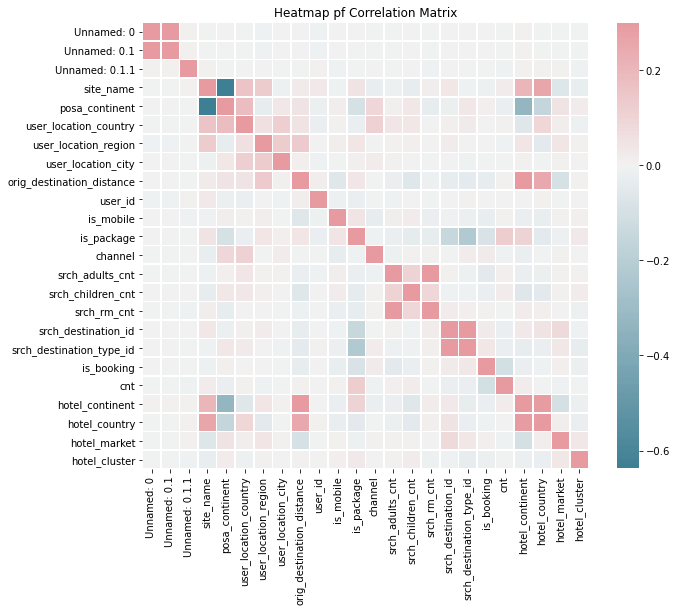

In [9]:
# Generate our correlation plot or heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220,10,as_cmap = True)

sns.heatmap(corr, xticklabels=corr.columns.values,
           yticklabels=corr.columns.values, cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink":.82})
plt.title('Heatmap pf Correlation Matrix')

array([[<AxesSubplot:title={'center':'channel'}>,
        <AxesSubplot:title={'center':'is_booking'}>,
        <AxesSubplot:title={'center':'is_mobile'}>],
       [<AxesSubplot:title={'center':'orig_destination_distance'}>,
        <AxesSubplot:title={'center':'srch_rm_cnt'}>,
        <AxesSubplot:title={'center':'srch_adults_cnt'}>],
       [<AxesSubplot:title={'center':'srch_children_cnt'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

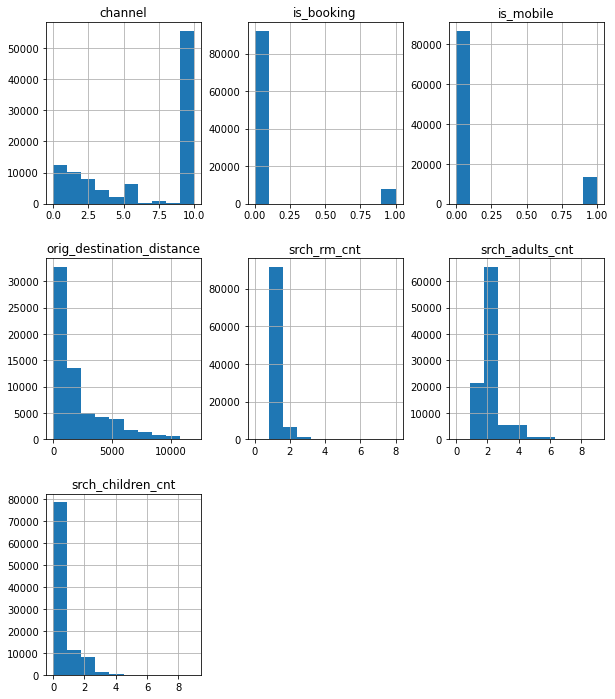

In [10]:
# Plot some of the Data
travel[['channel','is_booking','is_mobile','orig_destination_distance','srch_rm_cnt','srch_adults_cnt','srch_children_cnt']].hist(figsize=(10,12))

In [11]:
booking_count_per_user = travel.groupby('user_id')['is_booking'].agg(['count']).reset_index()
booking_count_per_user.head()

,user_id,count
0,14,1
1,38,1
2,40,1
3,156,2
4,160,1


In [12]:
# Consilidate by user IDs
travel.groupby('user_id')['is_booking'].agg(['count']).head()

,count
user_id,
14,1
38,1
40,1
156,2
160,1


array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

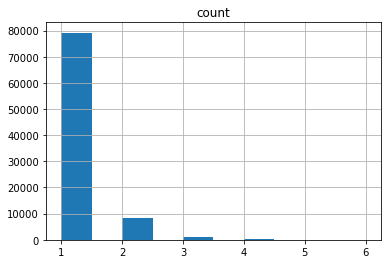

In [13]:
booking_count_per_user[['count']].hist(figsize=(6,4))

In [14]:
# Merge this with our original dataframe to add our 'count' column
# default ‘inner’, merging on user_id
travel = travel.merge(travel.groupby('user_id')['is_booking'].agg(['count']).reset_index())
travel.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,...,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count
0,0,0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,...,1,8286,1,0,1,0,63,1258,68,2
1,32335,32335,24636169,2014-07-28 23:50:54,24,2,77,871,36643,454.4611,...,1,8286,1,0,1,0,63,1258,14,2
2,1,1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,...,1,1842,3,0,1,2,198,786,37,1
3,2,2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,...,1,8746,1,0,1,6,105,29,22,1
4,3,3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,...,1,6210,3,1,1,2,198,1234,42,2


## Logic Checks

In [15]:
# number of guests (number of travelers) need to be > 0
# We use crosstab to group the counts
pd.crosstab(travel['srch_adults_cnt'],travel['srch_children_cnt'])

srch_children_cnt,0,1,2,3,4,5,6,7,8,9
srch_adults_cnt,,,,,,,,,,
0,174,2,3,2,0,0,0,0,0,0
1,18749,2137,523,117,11,1,9,1,2,0
2,50736,7093,6529,972,208,14,7,1,0,0
3,3645,1131,469,131,27,5,2,2,0,2
4,3933,690,494,77,83,9,4,0,0,0
5,535,131,41,20,6,4,2,0,0,0
6,669,73,53,28,18,13,7,0,0,0
7,99,20,5,8,6,3,0,0,0,0
8,183,12,13,2,6,1,3,2,2,1


In [16]:
# Then we sum the counts of travellers and drop the rows that are equal to zero
travel.drop(travel[travel['srch_adults_cnt'] + travel['srch_children_cnt']==0].index).head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,...,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count
0,0,0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,...,1,8286,1,0,1,0,63,1258,68,2
1,32335,32335,24636169,2014-07-28 23:50:54,24,2,77,871,36643,454.4611,...,1,8286,1,0,1,0,63,1258,14,2
2,1,1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,...,1,1842,3,0,1,2,198,786,37,1
3,2,2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,...,1,8746,1,0,1,6,105,29,22,1
4,3,3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,...,1,6210,3,1,1,2,198,1234,42,2


In [17]:
# Changing the column type to datetime type using pandas
travel['srch_co'] = pd.to_datetime(travel['srch_co'])
travel['srch_ci'] = pd.to_datetime(travel['srch_ci'])
travel['date_time'] = pd.to_datetime(travel['date_time'])

#Change the timestamp of 'date_time' (2014-11-03 16:02:28) to simply "2014-11-03"
travel['date'] = pd.to_datetime(travel['date_time'].apply(lambda x: x.date()))

travel.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,...,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count,date
0,0,0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,...,8286,1,0,1,0,63,1258,68,2,2014-11-03
1,32335,32335,24636169,2014-07-28 23:50:54,24,2,77,871,36643,454.4611,...,8286,1,0,1,0,63,1258,14,2,2014-07-28
2,1,1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,...,1842,3,0,1,2,198,786,37,1,2013-03-13
3,2,2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,...,8746,1,0,1,6,105,29,22,1,2014-10-13
4,3,3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,...,6210,3,1,1,2,198,1234,42,2,2013-11-05


In [18]:
# Let's create some new useful info (not always necessary but help when doing clusters/decision trees)
def duration(row):
    '''Gives the duration of trip by taking the row as an input and finding the time (in days) between checkin and checkout'''
    delta = (row['srch_co'] - row['srch_ci'])/np.timedelta64(1,'D')
    if delta <= 0:
        return np.nan
    else:
        return delta
    
def days_in_advance(row):
    '''Gives the days the trip was booked in advance'''
    delta = (row['srch_ci'] - row['date'])/np.timedelta64(1,'D')
    if delta < 0:
        return np.nan
    else:
        return delta
    
# Duration is finds the length of stays by subtracting the checkout day fromthe checkin day
travel['duration'] = travel.apply(duration, axis=1)

# Shows how long in advance the booking was made. Done by subtracting the checkin date from the booking date
travel['days_in_advance'] = travel.apply(days_in_advance, axis=1)

In [19]:
travel.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,...,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count,date,duration,days_in_advance
0,0,0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,...,0,1,0,63,1258,68,2,2014-11-03,4.0,42.0
1,32335,32335,24636169,2014-07-28 23:50:54,24,2,77,871,36643,454.4611,...,0,1,0,63,1258,14,2,2014-07-28,5.0,29.0
2,1,1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,...,0,1,2,198,786,37,1,2013-03-13,1.0,0.0
3,2,2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,...,0,1,6,105,29,22,1,2014-10-13,7.0,172.0
4,3,3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,...,1,1,2,198,1234,42,2,2013-11-05,1.0,2.0


## Statistical Analysis of Booking Channels

In [20]:
# Let's Look at how each channel performs by seeing the booking rate for each channel type
# booking rate per channel
travel.groupby('channel').agg(booking_rate = ('is_booking','mean'),num_of_booking = ('is_booking','count')).reset_index().sort_values(by = 'channel')

,channel,booking_rate,num_of_booking
0,0,0.071948,12523
1,1,0.069690,10274
2,2,0.060490,7836
3,3,0.060400,4404
4,4,0.120784,2194
5,5,0.094349,6158
6,6,0.067901,162
7,7,0.043157,811
8,8,0.055351,271
9,9,0.085381,55352


In [21]:
def stats_comparison(i):
    "Return a breakdown of stats per channel"
    travel.groupby(i).agg(average= ('is_booking','mean'), bookings = ('is_booking','count')).reset_index()
    cat =  travel.groupby(i).agg(sub_average= ('is_booking','mean'), sub_bookings = ('is_booking','count')).reset_index()
    cat['overall_average'] = travel['is_booking'].mean()
    cat['overall_bookings'] = travel['is_booking'].count()
    # Gives the sum of the other types of bookings
    cat['rest_bookings'] = cat['overall_bookings'] - cat['sub_bookings']
    # Gives the average of the other bookings.
    cat['rest_average'] = (cat['overall_bookings']*cat['overall_average'] - cat['sub_bookings']*cat['sub_average'])/cat['rest_bookings']
    # A z-score is the number of standard deviations from the mean a data point is.
    # We get the z-scores for channel average compared to the average of the others (excluding the channel we are analyzing)
    cat['z_score'] = (cat['sub_average']-cat['rest_average'])/np.sqrt(cat['overall_average']*(1-cat['overall_average'])*(1/cat['sub_bookings']+1/cat['rest_bookings']))
    cat['prob'] = np.around(stats.norm.cdf(cat.z_score), decimals = 10)
    cat['significant'] = [(lambda x: 1 if x > 0.9 else -1 if x < 0.1 else 0)(i) for i in cat['prob']]
    return cat

stats_comparison('channel')

,channel,sub_average,sub_bookings,overall_average,overall_bookings,rest_bookings,rest_average,z_score,prob,significant
0,0,0.071948,12523,0.07993,100000,87477,0.081073,-3.521880,2.142494e-04,-1
1,1,0.069690,10274,0.07993,100000,89726,0.081102,-4.040405,2.667950e-05,-1
2,2,0.060490,7836,0.07993,100000,92164,0.081583,-6.609924,0.000000e+00,-1
3,3,0.060400,4404,0.07993,100000,95596,0.080830,-4.888198,5.088000e-07,-1
4,4,0.120784,2194,0.07993,100000,97806,0.079014,7.135170,1.000000e+00,1
5,5,0.094349,6158,0.07993,100000,93842,0.078984,4.307105,9.999917e-01,1
6,6,0.067901,162,0.07993,100000,99838,0.079950,-0.565022,2.860294e-01,0
7,7,0.043157,811,0.07993,100000,99189,0.080231,-3.877458,5.277670e-05,-1
8,8,0.055351,271,0.07993,100000,99729,0.079997,-1.494103,6.757429e-02,-1
9,9,0.085381,55352,0.07993,100000,44648,0.073172,7.077231,1.000000e+00,1


# Let's start clustering

## Step 1: Let's choose some features using our business domain knowledge and explore these features.

In [22]:
# Our selected features
features_to_explore = ['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile', 
                       'is_package', 'srch_adults_cnt','srch_children_cnt', 'srch_rm_cnt']

# Let's create two new dataframes with our new data called city data and another where we do a groupby on city_data on user_location_city
city_data = travel.dropna(axis=0)[features_to_explore + ['user_location_city']]
city_groups = city_data.groupby('user_location_city').mean().reset_index().dropna(axis=0)

In [23]:
city_groups.head()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,0,2.0000,78.50,2315.83625,0.0000,0.25,1.7500,0.00,1.0
1,3,4.5625,92.25,3550.01750,0.0625,0.25,1.9375,0.50,1.0
2,7,14.0000,58.00,5994.86400,0.0000,1.00,2.0000,0.00,1.0
3,14,7.0000,35.75,5342.81910,0.0000,0.00,2.0000,0.75,1.0
4,21,5.0000,31.50,2165.76890,0.0000,0.50,1.5000,1.00,1.0


In [24]:
city_groups.shape

(4531, 9)

In [25]:
city_data.head()

,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,user_location_city
0,4.0,42.0,456.1151,0,1,2,0,1,36643
1,5.0,29.0,454.4611,0,1,1,0,1,36643
2,1.0,0.0,232.4737,0,0,2,0,1,38749
3,7.0,172.0,4468.2720,0,1,2,0,1,48562
4,1.0,2.0,171.6021,0,0,2,0,1,52752


In [26]:
city_groups.describe()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
count,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000
mean,28370.730082,3.371721,56.345617,1796.236344,0.134931,0.251183,2.068621,0.363318,1.120341
std,16461.359756,2.078043,46.340213,1609.729877,0.226245,0.302437,0.657345,0.535894,0.369686
min,0.000000,1.000000,0.000000,0.907100,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13978.000000,2.142857,25.291667,724.472890,0.000000,0.000000,1.857143,0.000000,1.000000
50%,28587.000000,3.000000,47.714286,1435.846152,0.000000,0.169811,2.000000,0.216216,1.000000
75%,42569.500000,4.000000,72.000000,2249.866586,0.192308,0.375000,2.130435,0.500000,1.102564
max,56507.000000,40.000000,366.000000,11428.188600,1.000000,1.000000,9.000000,8.000000,8.000000


## Step 2: Standardize our data

In [27]:
# We see the magnitude variations in our features are large (compare duration to is_mobile for example)
city_groups_std = city_groups.copy()

cols = ['duration', 'days_in_advance', 'orig_destination_distance',	'is_mobile', 'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']

city_groups_std[cols] = preprocessing.scale(city_groups_std[cols])

city_groups_std.headd()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,0,-0.660175,0.478134,0.322823,-0.596460,-0.003914,-0.484763,-0.678042,-0.325558
1,3,0.573092,0.774885,1.089608,-0.320181,-0.003914,-0.199493,0.255082,-0.325558
2,7,5.115126,0.035705,2.608569,-0.596460,2.476215,-0.104403,-0.678042,-0.325558
3,14,1.746200,-0.444493,2.203459,-0.596460,-0.830623,-0.104403,0.721644,-0.325558
4,21,0.783650,-0.536216,0.229587,-0.596460,0.822796,-0.865123,1.188206,-0.325558


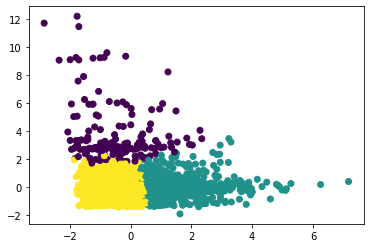

In [29]:
## Let's try arbitrarily 3 clusters
km = cluster.KMeans(n_clusters=3, max_iter=300, random_state=None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[features_to_explore])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)
city_groups_std['x'] = pca.fit_transform(city_groups_std[features_to_explore])[:,0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[features_to_explore])[:,1]
plt.scatter(city_groups_std['x'], city_groups_std['y'], c=city_groups_std['cluster'])
plt.show()

In [31]:
city_groups_std.head()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,cluster,x,y
0,0,-0.660175,0.478134,0.322823,-0.596460,-0.003914,-0.484763,-0.678042,-0.325558,2,0.119105,-0.515901
1,3,0.573092,0.774885,1.089608,-0.320181,-0.003914,-0.199493,0.255082,-0.325558,1,0.951140,-0.138827
2,7,5.115126,0.035705,2.608569,-0.596460,2.476215,-0.104403,-0.678042,-0.325558,1,3.856179,-0.285922
3,14,1.746200,-0.444493,2.203459,-0.596460,-0.830623,-0.104403,0.721644,-0.325558,1,1.065450,-0.085451
4,21,0.783650,-0.536216,0.229587,-0.596460,0.822796,-0.865123,1.188206,-0.325558,2,0.457189,-0.527191


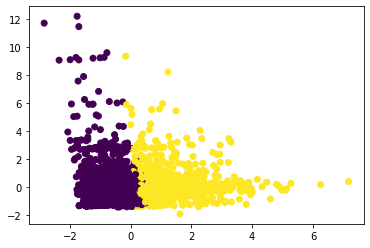

In [32]:
# Let's try it now with 2 clusters
## Let's try arbitrarily 3 clusters
km = cluster.KMeans(n_clusters=2, max_iter=300, random_state=None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[features_to_explore])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)
city_groups_std['x'] = pca.fit_transform(city_groups_std[features_to_explore])[:,0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[features_to_explore])[:,1]
plt.scatter(city_groups_std['x'], city_groups_std['y'], c=city_groups_std['cluster'])
plt.show()


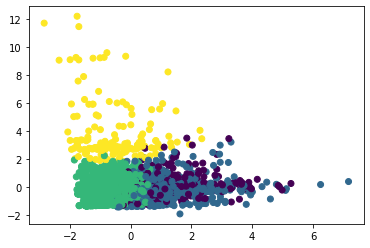

In [33]:
## Let's try arbitrarily 4 clusters
km = cluster.KMeans(n_clusters=4, max_iter=300, random_state=None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[features_to_explore])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)
city_groups_std['x'] = pca.fit_transform(city_groups_std[features_to_explore])[:,0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[features_to_explore])[:,1]
plt.scatter(city_groups_std['x'], city_groups_std['y'], c=city_groups_std['cluster'])
plt.show()

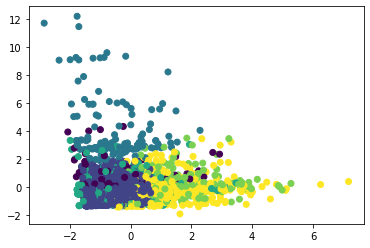

In [34]:
# Now with 6

km = cluster.KMeans(n_clusters=6, max_iter=300, random_state=None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[features_to_explore])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)

city_groups_std['x'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 1]
plt.scatter(city_groups_std['x'], city_groups_std['y'], c=city_groups_std['cluster'])
plt.show()

# Let's attempt to use the Elbow Method

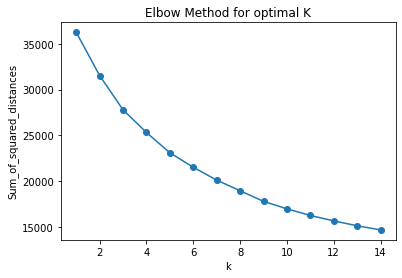

In [35]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []

# Use k from 1 to 15
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, max_iter=300, random_state=None)
    km = km.fit(city_groups_std[features_to_explore])
    # Get sum of square distances by applying km.inertia_
    Sum_of_squared_distances.append(km.inertia_)
    
# Plot Results
plt.plot(K, Sum_of_squared_distances, marker = 'o')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title("Elbow Method for optimal K")
plt.show()

## Let's try to use the Silhoette Coefficient

In [36]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2,11):
    kmeans = KMeans(n_clusters=n_cluster).fit(city_groups_std[features_to_explore])
    label = kmeans.labels_
    sil_coeff = silhouette_score(city_groups_std[features_to_explore], label, metric="euclidean")
    print('For n_clusters={}, The Silhoette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters=2, The Silhoette Coefficient is 0.23632635761752832
For n_clusters=3, The Silhoette Coefficient is 0.2707075805365758
For n_clusters=4, The Silhoette Coefficient is 0.2508212016827386
For n_clusters=5, The Silhoette Coefficient is 0.2615367836671217
For n_clusters=6, The Silhoette Coefficient is 0.2677217233526577
For n_clusters=7, The Silhoette Coefficient is 0.15957180936185975
For n_clusters=8, The Silhoette Coefficient is 0.16737285986870315
For n_clusters=9, The Silhoette Coefficient is 0.17302466019122315
For n_clusters=10, The Silhoette Coefficient is 0.17438744175591173


## Let's stick with K=3

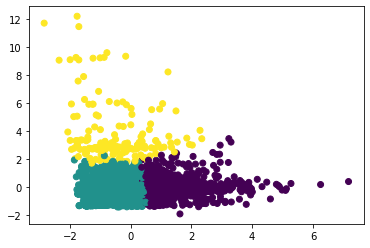

In [37]:
## Let's try arbitrarily 3 clusters
km = cluster.KMeans(n_clusters=3, max_iter=300, random_state=None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[features_to_explore])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)
city_groups_std['x'] = pca.fit_transform(city_groups_std[features_to_explore])[:,0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[features_to_explore])[:,1]
plt.scatter(city_groups_std['x'], city_groups_std['y'], c=city_groups_std['cluster'])
plt.show()

# Step 4 : Profile and inspect our 3 clusters

In [39]:
# We will merge the two dataframes based on a common column user_location city
city_groups.merge(city_groups_std[['user_location_city','cluster']]).groupby('cluster').mean() # for every column

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
cluster,,,,,,,,,
0,29009.211203,5.275738,102.210088,3186.902193,0.108615,0.479942,2.013117,0.323480,1.068254
1,28034.313624,2.755890,41.176118,1347.189129,0.143610,0.178382,1.982989,0.366768,1.072509
2,30907.850932,3.042961,55.256884,1540.887311,0.136077,0.187474,4.189130,0.562474,2.447412


In [40]:
city_groups_std.head()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,cluster,x,y
0,0,-0.660175,0.478134,0.322823,-0.596460,-0.003914,-0.484763,-0.678042,-0.325558,1,0.119105,-0.515901
1,3,0.573092,0.774885,1.089608,-0.320181,-0.003914,-0.199493,0.255082,-0.325558,0,0.951140,-0.138827
2,7,5.115126,0.035705,2.608569,-0.596460,2.476215,-0.104403,-0.678042,-0.325558,0,3.856179,-0.285922
3,14,1.746200,-0.444493,2.203459,-0.596460,-0.830623,-0.104403,0.721644,-0.325558,0,1.065450,-0.085451
4,21,0.783650,-0.536216,0.229587,-0.596460,0.822796,-0.865123,1.188206,-0.325558,1,0.457189,-0.527191


In [42]:
city_groups_std['cluster'].uniqueque()

array([1, 0, 2])

<AxesSubplot:xlabel='cluster'>

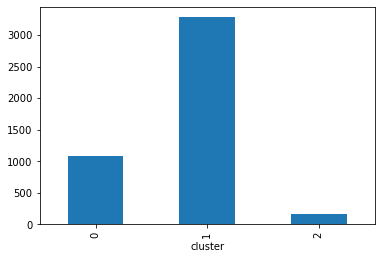

In [44]:
# Plot our Cluster count
city_groups_std.groupby('cluster')['user_location_city'].agg('count').plot(kind = 'bar')